In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df["low"].value_counts()

low
med     576
high    576
low     575
Name: count, dtype: int64

In [4]:
df.rename(columns={'vhigh':'buying', 'vhigh.1':'maintenace', '2':'doors', '2.1':'persons', 'small':'luggage boot size','low':'safety','unacc':'class'},inplace=True)

In [5]:
df.head()

,buying,maintenace,doors,persons,luggage boot size,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying             1727 non-null   object
 1   maintenace         1727 non-null   object
 2   doors              1727 non-null   object
 3   persons            1727 non-null   object
 4   luggage boot size  1727 non-null   object
 5   safety             1727 non-null   object
 6   class              1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df['doors'].value_counts()

doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64

In [8]:
df["doors"] = df["doors"].replace("5more", "5")

In [9]:
df["doors"] = df["doors"].astype(int)

In [10]:
df['persons'].value_counts()

persons
4       576
more    576
2       575
Name: count, dtype: int64

In [11]:
df['persons']=df['persons'].replace("more","5")

In [12]:
df['persons']=df["persons"].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying             1727 non-null   object
 1   maintenace         1727 non-null   object
 2   doors              1727 non-null   int64 
 3   persons            1727 non-null   int64 
 4   luggage boot size  1727 non-null   object
 5   safety             1727 non-null   object
 6   class              1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


# Visualizations


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Which car classes (unacc=3, acc=0, good=1, vgood=2) are most common.

C:\Users\Nilesh\AppData\Local\Temp\ipykernel_12712\922680579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='viridis')


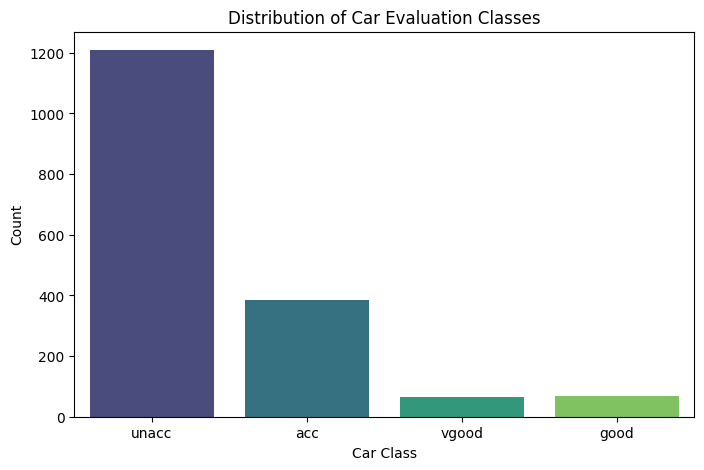

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='class', palette='viridis')
plt.title('Distribution of Car Evaluation Classes')
plt.xlabel('Car Class')
plt.ylabel('Count')
plt.show()


Compare Safety vs Car Class

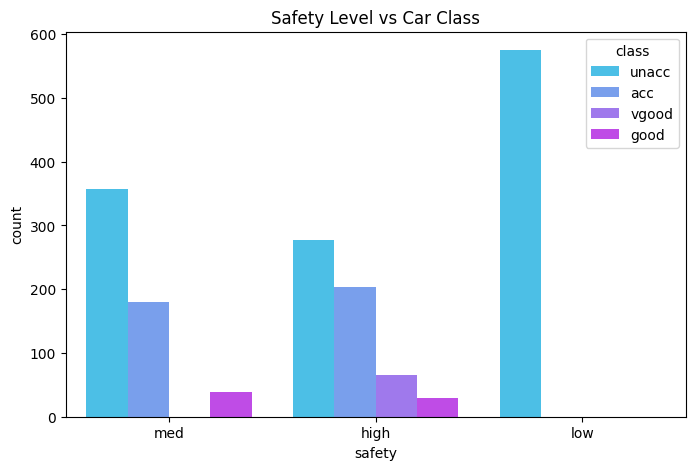

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='safety', hue='class', palette='cool')
plt.title('Safety Level vs Car Class')
plt.show()


Compare Buying Price vs Car Class

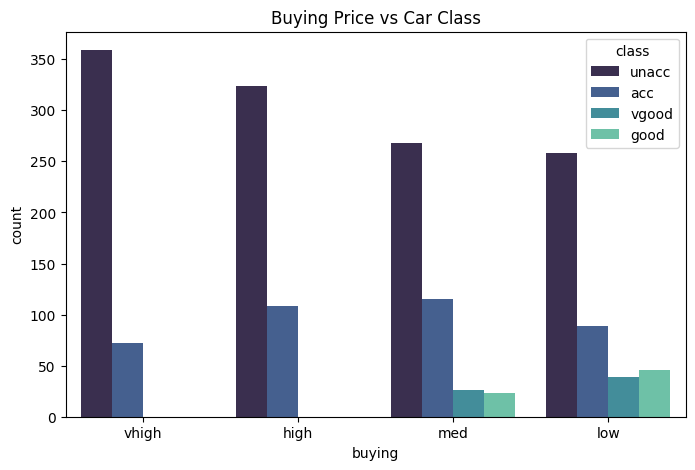

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='buying', hue='class', palette='mako')
plt.title('Buying Price vs Car Class')
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
columns = ['buying', 'maintenace', 'luggage boot size', 'safety', 'class']

In [20]:
lebel = LabelEncoder()

for col in columns:
    df[col] = lebel.fit_transform(df[col])

In [21]:
df.head()

,buying,maintenace,doors,persons,luggage boot size,safety,class
0,3,3,2,2,2,2,2
1,3,3,2,2,2,0,2
2,3,3,2,2,1,1,2
3,3,3,2,2,1,2,2
4,3,3,2,2,1,0,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   buying             1727 non-null   int64
 1   maintenace         1727 non-null   int64
 2   doors              1727 non-null   int64
 3   persons            1727 non-null   int64
 4   luggage boot size  1727 non-null   int64
 5   safety             1727 non-null   int64
 6   class              1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [23]:
X = df.drop("class",axis=1)
y = df["class"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# DecisionTree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred_dt = dt.predict(X_test)

In [29]:
DecisionTree ="Decision Tree Accuracy :", accuracy_score(y_test, y_pred_dt)
DecisionTree

('Decision Tree Accuracy :', 0.9710982658959537)

# Rondom forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred_rf = dt.predict(X_test)

In [33]:
Random_forest ="Random Forest Accuracy :",accuracy_score(y_test, y_pred_rf) 
Random_forest

('Random Forest Accuracy :', 0.9710982658959537)

# XGboost

In [34]:
from xgboost import XGBClassifier

In [35]:
xg = XGBClassifier()
xg.fit(X_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [36]:
y_pred_xg = xg.predict(X_test)

In [37]:
xgboost ="xgboost Accuracy :",accuracy_score(y_test,y_pred_xg)
xgboost

('xgboost Accuracy :', 1.0)

In [38]:

data = [[3,3,2,2,2,2]] 
prediction = xg.predict(data)
print("Predicted class:", prediction)


Predicted class: [2]


In [39]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGboost'],
    'Accuracy': [DecisionTree, Random_forest, xgboost]
})

print(results)

           Model                                        Accuracy
0  Decision Tree  (Decision Tree Accuracy :, 0.9710982658959537)
1  Random Forest  (Random Forest Accuracy :, 0.9710982658959537)
2        XGboost                       (xgboost Accuracy :, 1.0)


# The best model for the Car Evaluation dataset is XGBoost with an accuracy of 100%.

In [40]:
best_model = xg


In [41]:
import joblib

joblib.dump(best_model, "best_model.joblib")

print("Model saved successfully!")


Model saved successfully!
